<a href="https://colab.research.google.com/github/goldiezhu/BIS634/blob/main/A4/hw4_fib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




100%|██████████| 39/39 [00:00<00:00, 102364.12it/s]



  0%|          | 0/39 [00:00<?, ?it/s]


 64%|██████▍   | 25/39 [00:00<00:00, 162.17it/s]


 64%|██████▍   | 25/39 [00:15<00:00, 162.17it/s]


 90%|████████▉ | 35/39 [00:18<00:02,  1.52it/s] 


 92%|█████████▏| 36/39 [00:29<00:03,  1.17s/it]


 95%|█████████▍| 37/39 [00:47<00:04,  2.30s/it]


 97%|█████████▋| 38/39 [01:17<00:04,  4.68s/it]


 77%|███████▋  | 30/39 [20:54<06:16, 41.83s/it] 


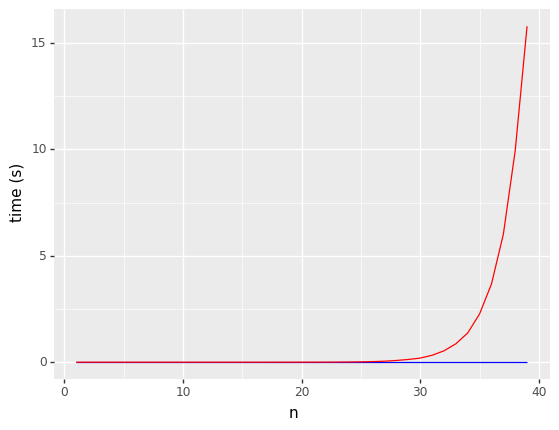

<ggplot: (8782141345464)>

In [18]:
# The n-th Fibonacci number is the sum of the (n-1)th and (n-2)th
from functools import lru_cache
import time
import pandas as pd
import plotnine as p9
from tqdm import tqdm

### Recursive Strategy ###
def fib_rec(n):
    if (n <= 1):
        return n
    else:
        return(fib_rec(n-1) + fib_rec(n-2))

def timeit(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.time()
        function(*args)
        times.append(time.time() - start)
    return min(times)

# The n-th Fibonacci number is the sum of the (n-1)th and (n-2)th

### LRU Cache ###
@lru_cache()
def fib_cache(n):
    if n in {1,2}:
        return n
    return(fib_cache(n-1) + fib_cache(n-2))

def timeit(function, *args, n=3):
    times = []
    for i in range(n):
        start = time.time()
        function(*args)
        times.append(time.time() - start)
    return min(times)

ns = range(1,40)
times = [timeit(fib_cache,n) for n in tqdm(ns)]
times1 = [timeit(fib_rec,n) for n in tqdm(ns)]


df = pd.DataFrame({'n':ns, 'time (s)': times, 'time1 (s)': times1})
df['x'] = df.index
p9.ggplot(p9.aes(x='n'), data=df) +\
    p9.geom_line(p9.aes(y='time (s)'), color='blue') +\
    p9.geom_line(p9.aes(y='time1 (s)'), color='red') 